### Importing Libraries

In [2]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

### Loading data

In [3]:
# import csv files from data folder
freezer_df = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\\freezer_data.csv')
outlets_df = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\outlets_data.csv')
product_df = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\product_data.csv')
sales_df = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\sales_data.csv')
week_df = pd.read_csv('E:\DSE\DataStorm 4.0\Semifinal\Data Storn - Semi final data sets\week_data.csv')

### Data Cleaning

In [4]:
# temp_outlets_df = pd.read_csv('outlets_data.csv')
temp_outlets_df = outlets_df.copy()
temp_outlets_df

,Outlet_ID,area(sqft)
0,ID7203,5660
1,ID1878,4138
2,ID1740,5546
3,ID4366,5134
4,ID8358,4100
...,...,...
983,ID4119,3858
984,ID2978,3495
985,ID6549,1141
986,ID1210,3322


In [5]:
temp_outlets_df['Outlet_ID'].duplicated().sum()


37

In [6]:
# calculate mean area for each Outlet_ID
df_mean = outlets_df.groupby('Outlet_ID', as_index=False)['area(sqft)'].mean()

# drop duplicates
outlets_df = df_mean.drop_duplicates(subset=['Outlet_ID'])

In [7]:
freezer_df

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [8]:
outlets_df

,Outlet_ID,area(sqft)
0,ID1008,3387.0
1,ID1012,1931.0
2,ID1024,3127.0
3,ID1029,5294.0
4,ID1036,2584.0
...,...,...
946,ID9960,4690.0
947,ID9971,3960.0
948,ID9973,4038.0
949,ID9979,4456.0


In [9]:
product_df

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100
5,BP1,1.0,Chocolate Fudge Big Scoop,1200
6,BP2,1.0,Moose Tracks Jumbo Cup,1100
7,BP3,1.0,Mint Chocolate Chip Family Pack,1150
8,BP4,1.0,Rocky Road Mega Tub,1000
9,BP5,1.0,Cookies and Cream Mega Tub,1100


In [10]:
sales_df

,Outlet_ID,week,pid,product_name,no_units
0,ID7203,1,IP1,Vanilla Mini Cone,874.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0
...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0


### Feature creation 

In [11]:
# merge sales_df and product_df on product_id
sales_product_df = pd.merge(sales_df, product_df.drop(['product_name'], axis=1), on='pid', how='left')
sales_product_df

,Outlet_ID,week,pid,product_name,no_units,volume,price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100
...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,1200
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,1100
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,1150
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,1000


In [12]:
x = sales_product_df[sales_product_df['pid'] == 'IP1'][['Outlet_ID', 'no_units', 'volume', 'price', 'week']]
x

,Outlet_ID,no_units,volume,price,week
0,ID7203,874.0,0.2,100,1
5,ID7203,644.0,0.2,100,2
9,ID7203,600.0,0.2,100,3
14,ID7203,106.0,0.2,100,4
18,ID7203,775.0,0.2,100,5
...,...,...,...,...,...
80955,ID8207,216.0,0.2,100,8
80963,ID8207,213.0,0.2,100,9
80972,ID8207,558.0,0.2,100,10
80980,ID8207,580.0,0.2,100,11


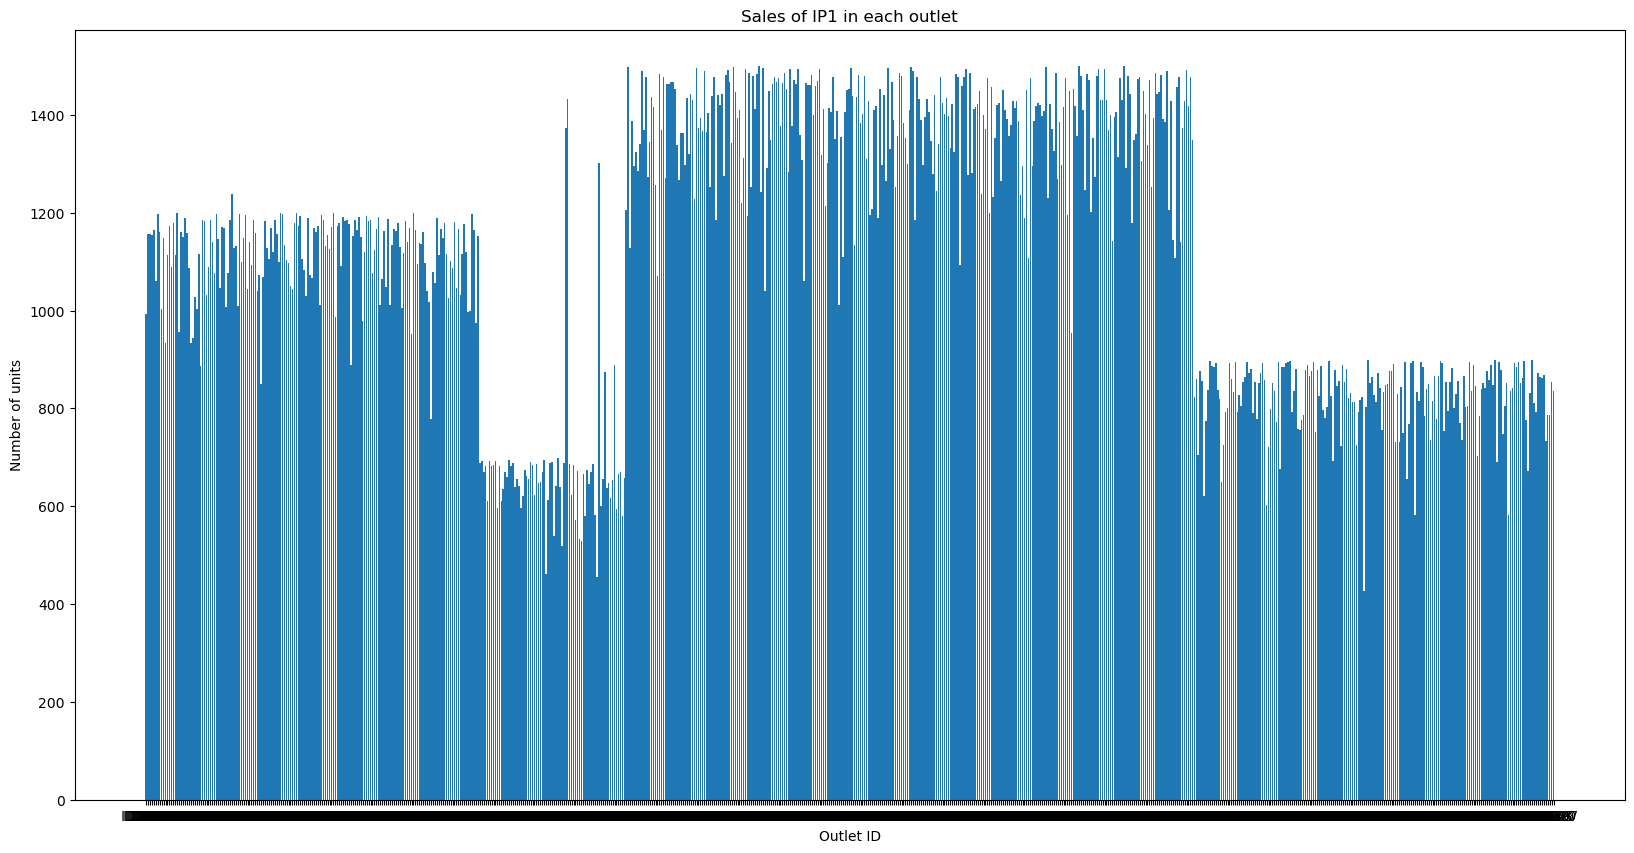

In [13]:
# plot the sales of IP1 in each outlet bar plot matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(x['Outlet_ID'], x['no_units'])
ax.set_xlabel('Outlet ID')
ax.set_ylabel('Number of units')
ax.set_title('Sales of IP1 in each outlet')
plt.show()

In [14]:
sales_product_df['total_volume'] = sales_product_df['no_units'] * sales_product_df['volume']
sales_product_df['total_price'] = sales_product_df['no_units'] * sales_product_df['price']
sales_product_df

,Outlet_ID,week,pid,product_name,no_units,volume,price,total_volume,total_price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,174.8,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,21.0,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,239.6,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,100.4,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,142.0,71000.0
...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,1200,56.0,67200.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,1100,60.0,66000.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,1150,51.0,58650.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,1000,78.0,78000.0


In [15]:
new_sales_product_df = sales_product_df.groupby(['Outlet_ID', 'week']).agg({'no_units': 'sum', 'total_volume': 'sum', 'total_price': 'sum'}).reset_index()
new_sales_product_df

,Outlet_ID,week,no_units,total_volume,total_price
0,ID1008,1,3990.0,798.0,397290.0
1,ID1008,2,3293.0,658.6,332330.0
2,ID1008,3,3590.0,718.0,362450.0
3,ID1008,4,2691.0,538.2,273290.0
4,ID1008,5,1522.0,304.4,155790.0
...,...,...,...,...,...
11407,ID9980,8,4475.0,1635.0,1390610.0
11408,ID9980,9,4454.0,1718.0,1503900.0
11409,ID9980,10,4118.0,1474.8,1249670.0
11410,ID9980,11,5315.0,1796.6,1438450.0


In [16]:
len(new_sales_product_df['Outlet_ID'].unique())

951

In [17]:
# average volume sold per week in each outlet
new_sales_product_df

,Outlet_ID,week,no_units,total_volume,total_price
0,ID1008,1,3990.0,798.0,397290.0
1,ID1008,2,3293.0,658.6,332330.0
2,ID1008,3,3590.0,718.0,362450.0
3,ID1008,4,2691.0,538.2,273290.0
4,ID1008,5,1522.0,304.4,155790.0
...,...,...,...,...,...
11407,ID9980,8,4475.0,1635.0,1390610.0
11408,ID9980,9,4454.0,1718.0,1503900.0
11409,ID9980,10,4118.0,1474.8,1249670.0
11410,ID9980,11,5315.0,1796.6,1438450.0


In [18]:
sales_by_week = sales_product_df.groupby(['Outlet_ID', 'week'])['no_units'].sum().reset_index()
sales_by_week

,Outlet_ID,week,no_units
0,ID1008,1,3990.0
1,ID1008,2,3293.0
2,ID1008,3,3590.0
3,ID1008,4,2691.0
4,ID1008,5,1522.0
...,...,...,...
11407,ID9980,8,4475.0
11408,ID9980,9,4454.0
11409,ID9980,10,4118.0
11410,ID9980,11,5315.0


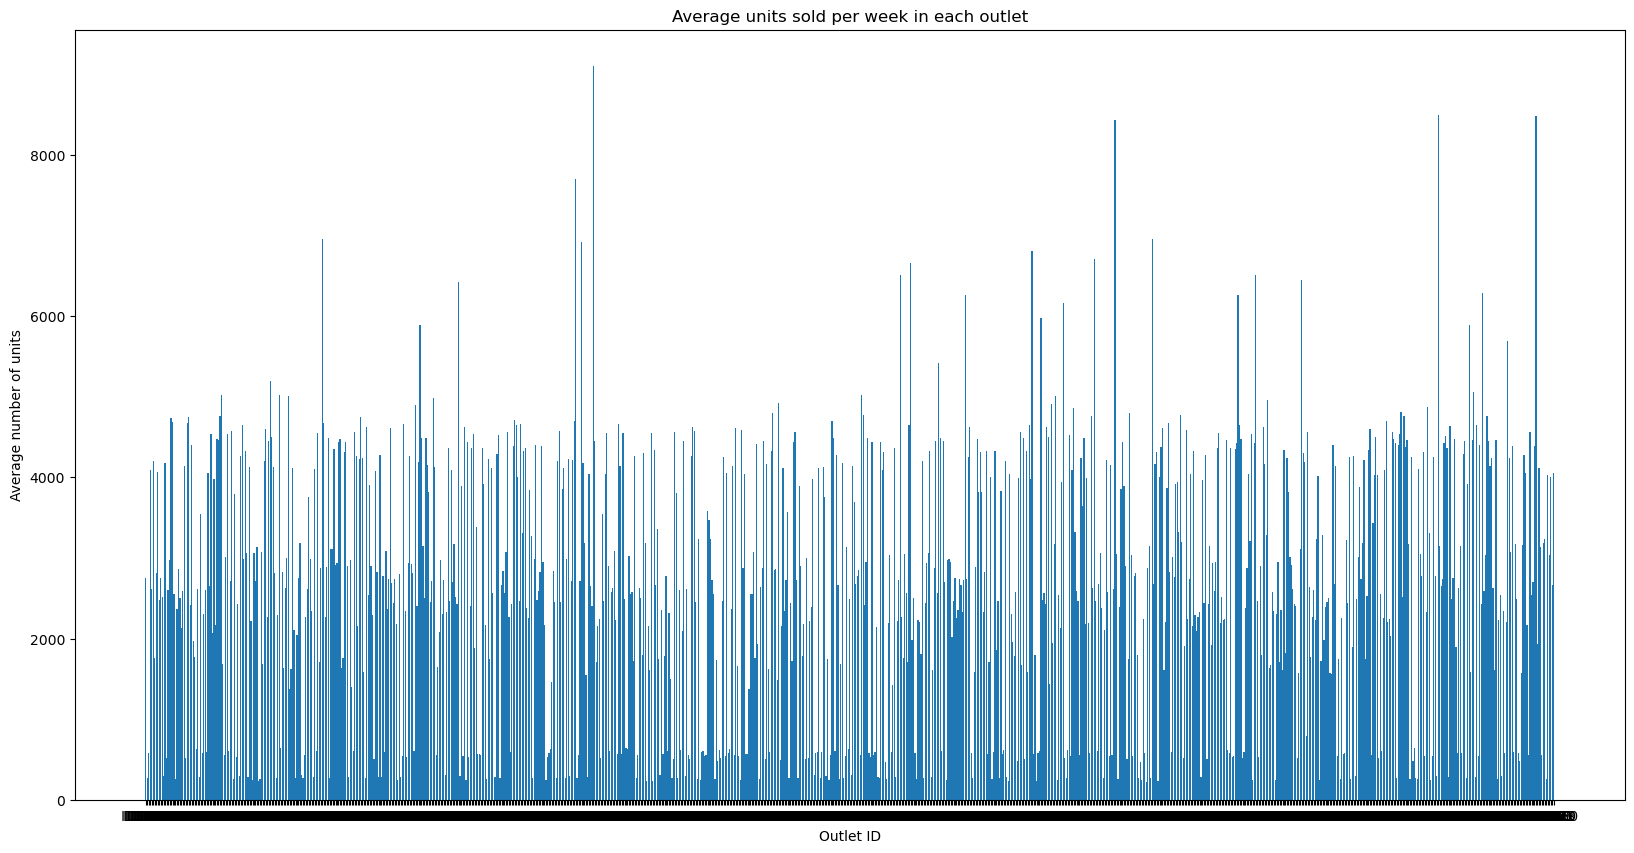

In [19]:
# average units sold per week in each outlet
avg_units_df = sales_by_week.groupby('Outlet_ID')['no_units'].mean().reset_index()

# average units sold per week in each outlet bar plot matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(avg_units_df['Outlet_ID'], avg_units_df['no_units'])
ax.set_xlabel('Outlet ID')
ax.set_ylabel('Average number of units')
ax.set_title('Average units sold per week in each outlet')
plt.show()

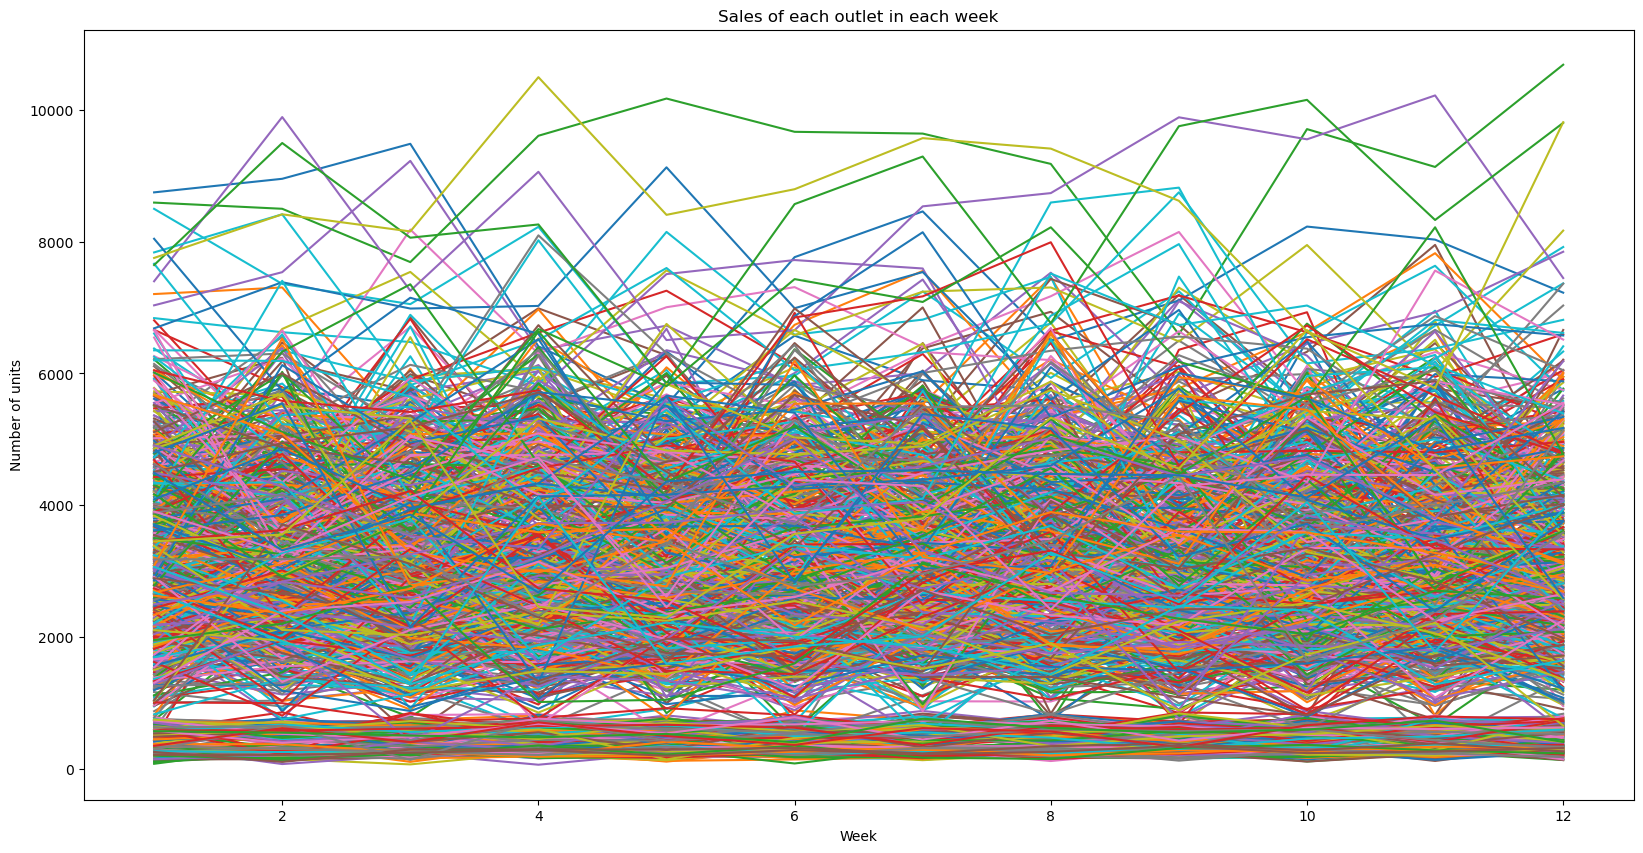

In [20]:
# plot the sales of each outlet in each week line plot matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
for outlet in sales_by_week['Outlet_ID'].unique():
    ax.plot(sales_by_week[sales_by_week['Outlet_ID'] == outlet]['week'], sales_by_week[sales_by_week['Outlet_ID'] == outlet]['no_units'], label=outlet)
ax.set_xlabel('Week')
ax.set_ylabel('Number of units')
ax.set_title('Sales of each outlet in each week')
plt.show()

In [21]:
sales_pivot = sales_by_week.pivot(index='Outlet_ID', columns='week', values='no_units').fillna(0)
sales_pivot

week,1,2,3,4,5,6,7,8,9,10,11,12
Outlet_ID,,,,,,,,,,,,
ID1008,3990.0,3293.0,3590.0,2691.0,1522.0,2007.0,2234.0,2518.0,2490.0,2502.0,2875.0,3290.0
ID1012,197.0,356.0,208.0,292.0,285.0,286.0,298.0,319.0,261.0,301.0,234.0,238.0
ID1024,526.0,602.0,486.0,574.0,592.0,221.0,831.0,640.0,497.0,744.0,603.0,627.0
ID1029,4373.0,3720.0,5055.0,3269.0,4048.0,4457.0,3431.0,3786.0,3661.0,4153.0,5261.0,3928.0
ID1036,2059.0,3299.0,2962.0,3558.0,1939.0,2824.0,1232.0,2176.0,3505.0,3276.0,3120.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...
ID9960,3905.0,3300.0,4129.0,4725.0,2454.0,4385.0,4291.0,2419.0,4285.0,4464.0,4458.0,5553.0
ID9971,3178.0,3184.0,3223.0,2327.0,3435.0,2771.0,2964.0,3464.0,4439.0,1656.0,2255.0,3587.0
ID9973,3453.0,3555.0,5284.0,2459.0,2293.0,3566.0,3800.0,5328.0,4556.0,6658.0,4537.0,2579.0


In [22]:
sales_pivot.columns = ['total_units_week_' + str(col) for col in sales_pivot.columns]
sales_pivot = sales_pivot.reset_index()
sales_pivot

,Outlet_ID,total_units_week_1,total_units_week_2,total_units_week_3,total_units_week_4,total_units_week_5,total_units_week_6,total_units_week_7,total_units_week_8,total_units_week_9,total_units_week_10,total_units_week_11,total_units_week_12
0,ID1008,3990.0,3293.0,3590.0,2691.0,1522.0,2007.0,2234.0,2518.0,2490.0,2502.0,2875.0,3290.0
1,ID1012,197.0,356.0,208.0,292.0,285.0,286.0,298.0,319.0,261.0,301.0,234.0,238.0
2,ID1024,526.0,602.0,486.0,574.0,592.0,221.0,831.0,640.0,497.0,744.0,603.0,627.0
3,ID1029,4373.0,3720.0,5055.0,3269.0,4048.0,4457.0,3431.0,3786.0,3661.0,4153.0,5261.0,3928.0
4,ID1036,2059.0,3299.0,2962.0,3558.0,1939.0,2824.0,1232.0,2176.0,3505.0,3276.0,3120.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,3905.0,3300.0,4129.0,4725.0,2454.0,4385.0,4291.0,2419.0,4285.0,4464.0,4458.0,5553.0
947,ID9971,3178.0,3184.0,3223.0,2327.0,3435.0,2771.0,2964.0,3464.0,4439.0,1656.0,2255.0,3587.0
948,ID9973,3453.0,3555.0,5284.0,2459.0,2293.0,3566.0,3800.0,5328.0,4556.0,6658.0,4537.0,2579.0
949,ID9979,3065.0,2357.0,1307.0,4122.0,1594.0,1856.0,2012.0,3283.0,2531.0,4047.0,1778.0,3940.0


In [23]:
volume_by_week = sales_product_df.groupby(['Outlet_ID', 'week'])['total_volume'].sum().reset_index()
volume_pivot = volume_by_week.pivot(index='Outlet_ID', columns='week', values='total_volume').fillna(0)
volume_pivot.columns = ['total_volume_week_' + str(col) for col in volume_pivot.columns]
volume_pivot = volume_pivot.reset_index()
volume_pivot

,Outlet_ID,total_volume_week_1,total_volume_week_2,total_volume_week_3,total_volume_week_4,total_volume_week_5,total_volume_week_6,total_volume_week_7,total_volume_week_8,total_volume_week_9,total_volume_week_10,total_volume_week_11,total_volume_week_12
0,ID1008,798.0,658.6,718.0,538.2,304.4,401.4,446.8,503.6,498.0,500.4,575.0,658.0
1,ID1012,197.0,356.0,208.0,292.0,285.0,286.0,298.0,319.0,261.0,301.0,234.0,238.0
2,ID1024,526.0,602.0,486.0,574.0,592.0,221.0,831.0,640.0,497.0,744.0,603.0,627.0
3,ID1029,1676.2,1370.4,1520.6,1297.8,1088.0,1577.0,1058.2,1371.6,1482.6,1394.6,1634.6,1046.4
4,ID1036,603.8,875.8,852.4,907.6,623.8,680.0,458.4,672.8,917.8,828.8,860.8,519.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1609.8,1420.0,1452.2,1331.4,942.8,1507.4,1433.4,940.6,1585.0,1721.6,1286.8,1856.2
947,ID9971,635.6,636.8,644.6,465.4,687.0,554.2,592.8,692.8,887.8,331.2,451.0,717.4
948,ID9973,1287.4,1249.4,1718.4,950.2,1205.8,1257.2,1183.2,1484.8,1546.4,2002.8,1394.6,1188.6
949,ID9979,613.0,471.4,261.4,824.4,318.8,371.2,402.4,656.6,506.2,809.4,355.6,788.0


In [24]:
price_by_week = sales_product_df.groupby(['Outlet_ID', 'week'])['total_price'].sum().reset_index()
price_pivot = price_by_week.pivot(index='Outlet_ID', columns='week', values='total_price').fillna(0)
price_pivot.columns = ['total_price_week_' + str(col) for col in price_pivot.columns]
price_pivot = price_pivot.reset_index()
price_pivot

,Outlet_ID,total_price_week_1,total_price_week_2,total_price_week_3,total_price_week_4,total_price_week_5,total_price_week_6,total_price_week_7,total_price_week_8,total_price_week_9,total_price_week_10,total_price_week_11,total_price_week_12
0,ID1008,397290.0,332330.0,362450.0,273290.0,155790.0,193630.0,232630.0,255710.0,239730.0,248620.0,276250.0,323270.0
1,ID1012,216700.0,392100.0,235400.0,318150.0,319600.0,318600.0,337650.0,357950.0,290600.0,331650.0,263850.0,266400.0
2,ID1024,572800.0,665400.0,535000.0,633150.0,665100.0,254100.0,915200.0,720200.0,563350.0,831700.0,678900.0,691400.0
3,ID1029,1455650.0,1161290.0,1120140.0,1147010.0,755120.0,1345480.0,834160.0,1135820.0,1323670.0,1126310.0,1279490.0,717020.0
4,ID1036,440520.0,610310.0,628610.0,603120.0,490040.0,418460.0,399550.0,518090.0,621310.0,557330.0,610470.0,441060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,1434200.0,1298830.0,1212510.0,969840.0,810330.0,1216910.0,1155410.0,796000.0,1337360.0,1495310.0,964960.0,1492650.0
947,ID9971,313310.0,317550.0,327090.0,237150.0,342640.0,267830.0,292870.0,352740.0,444290.0,169810.0,228940.0,364100.0
948,ID9973,1115750.0,1066710.0,1356270.0,812140.0,1184750.0,1070700.0,939330.0,1035840.0,1243730.0,1516130.0,1079050.0,1081030.0
949,ID9979,300000.0,233900.0,136690.0,411890.0,160870.0,186810.0,202880.0,323890.0,256070.0,406210.0,168270.0,390830.0


In [25]:
product_variety = sales_product_df.groupby('Outlet_ID')['product_name'].nunique()
product_variety

Outlet_ID
ID1008     5
ID1012     5
ID1024     5
ID1029    10
ID1036    10
          ..
ID9960    10
ID9971     5
ID9973    10
ID9979     5
ID9980    10
Name: product_name, Length: 951, dtype: int64

In [26]:
data = sales_product_df.copy()

In [27]:
sales_product_df

,Outlet_ID,week,pid,product_name,no_units,volume,price,total_volume,total_price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,174.8,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,21.0,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,239.6,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,100.4,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,142.0,71000.0
...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,1200,56.0,67200.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,1100,60.0,66000.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,1150,51.0,58650.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,1000,78.0,78000.0


In [28]:
# get the average total volume sold per week in each outlet and merge it with sales_product_df
avg_volume = data.groupby(['Outlet_ID', 'week'])['total_volume'].sum().reset_index()
avg_volume = avg_volume.groupby('Outlet_ID')['total_volume'].mean().reset_index()
avg_volume.columns = ['Outlet_ID', 'avg_volume']

# add average volume to outlets_df
outlets_df = pd.merge(outlets_df, avg_volume, on='Outlet_ID', how='left')

In [29]:
# get the average total price sold per week in each outlet and merge it with sales_product_df
avg_price = data.groupby(['Outlet_ID', 'week'])['total_price'].sum().reset_index()
avg_price = avg_price.groupby('Outlet_ID')['total_price'].mean().reset_index()
avg_price.columns = ['Outlet_ID', 'avg_price']

# add average price to outlets_df as average income per week
outlets_df = pd.merge(outlets_df, avg_price, on='Outlet_ID', how='left')
outlets_df.rename(columns={'avg_price': 'avg_income'}, inplace=True)

In [30]:
outlets_df

,Outlet_ID,area(sqft),avg_volume,avg_income
0,ID1008,3387.0,550.033333,2.742492e+05
1,ID1012,1931.0,272.916667,3.040542e+05
2,ID1024,3127.0,578.583333,6.438583e+05
3,ID1029,5294.0,1376.500000,1.116763e+06
4,ID1036,2584.0,733.466667,5.282392e+05
...,...,...,...,...
946,ID9960,4690.0,1423.933333,1.182026e+06
947,ID9971,3960.0,608.050000,3.048600e+05
948,ID9973,4038.0,1372.400000,1.125119e+06
949,ID9979,4456.0,531.533333,2.648592e+05


In [31]:
# merge product_variety with outlets_df
outlets_df = pd.merge(outlets_df, product_variety, on='Outlet_ID', how='left')
outlets_df.rename(columns={'product_name': 'no_of_products'}, inplace=True)

In [32]:
# merge average units sold per week in each outlet with outlets_df
outlets_df = pd.merge(outlets_df, avg_units_df, on='Outlet_ID', how='left')
outlets_df.rename(columns={'no_units': 'avg_units'}, inplace=True)

In [33]:
out = outlets_df.copy()

In [34]:
out = pd.merge(out, price_pivot, on='Outlet_ID', how='left')
out = pd.merge(out, volume_pivot, on='Outlet_ID', how='left')
out = pd.merge(out, sales_pivot, on='Outlet_ID', how='left')
out


,Outlet_ID,area(sqft),avg_volume,avg_income,no_of_products,avg_units,total_price_week_1,total_price_week_2,total_price_week_3,total_price_week_4,...,total_units_week_3,total_units_week_4,total_units_week_5,total_units_week_6,total_units_week_7,total_units_week_8,total_units_week_9,total_units_week_10,total_units_week_11,total_units_week_12
0,ID1008,3387.0,550.033333,2.742492e+05,5,2750.166667,397290.0,332330.0,362450.0,273290.0,...,3590.0,2691.0,1522.0,2007.0,2234.0,2518.0,2490.0,2502.0,2875.0,3290.0
1,ID1012,1931.0,272.916667,3.040542e+05,5,272.916667,216700.0,392100.0,235400.0,318150.0,...,208.0,292.0,285.0,286.0,298.0,319.0,261.0,301.0,234.0,238.0
2,ID1024,3127.0,578.583333,6.438583e+05,5,578.583333,572800.0,665400.0,535000.0,633150.0,...,486.0,574.0,592.0,221.0,831.0,640.0,497.0,744.0,603.0,627.0
3,ID1029,5294.0,1376.500000,1.116763e+06,10,4095.166667,1455650.0,1161290.0,1120140.0,1147010.0,...,5055.0,3269.0,4048.0,4457.0,3431.0,3786.0,3661.0,4153.0,5261.0,3928.0
4,ID1036,2584.0,733.466667,5.282392e+05,10,2613.666667,440520.0,610310.0,628610.0,603120.0,...,2962.0,3558.0,1939.0,2824.0,1232.0,2176.0,3505.0,3276.0,3120.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,4690.0,1423.933333,1.182026e+06,10,4030.666667,1434200.0,1298830.0,1212510.0,969840.0,...,4129.0,4725.0,2454.0,4385.0,4291.0,2419.0,4285.0,4464.0,4458.0,5553.0
947,ID9971,3960.0,608.050000,3.048600e+05,5,3040.250000,313310.0,317550.0,327090.0,237150.0,...,3223.0,2327.0,3435.0,2771.0,2964.0,3464.0,4439.0,1656.0,2255.0,3587.0
948,ID9973,4038.0,1372.400000,1.125119e+06,10,4005.666667,1115750.0,1066710.0,1356270.0,812140.0,...,5284.0,2459.0,2293.0,3566.0,3800.0,5328.0,4556.0,6658.0,4537.0,2579.0
949,ID9979,4456.0,531.533333,2.648592e+05,5,2657.666667,300000.0,233900.0,136690.0,411890.0,...,1307.0,4122.0,1594.0,1856.0,2012.0,3283.0,2531.0,4047.0,1778.0,3940.0


In [35]:
# seperate pid to get the product type column
sales_product_df['product_type'] = sales_product_df['pid'].apply(lambda x: x[:2])
sales_product_df

,Outlet_ID,week,pid,product_name,no_units,volume,price,total_volume,total_price,product_type
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,174.8,87400.0,IP
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,21.0,9450.0,IP
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,239.6,131780.0,IP
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,100.4,50200.0,IP
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,142.0,71000.0,IP
...,...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,1200,56.0,67200.0,BP
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,1100,60.0,66000.0,BP
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,1150,51.0,58650.0,BP
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,1000,78.0,78000.0,BP


In [36]:
# apply one hot encoding for the product_type column
sales_product_df = pd.get_dummies(sales_product_df, columns=['product_type'], prefix='product_type', drop_first=True)

In [37]:
sales_product_df

,Outlet_ID,week,pid,product_name,no_units,volume,price,total_volume,total_price,product_type_IP
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,100,174.8,87400.0,1
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,90,21.0,9450.0,1
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,110,239.6,131780.0,1
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,100,100.4,50200.0,1
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,100,142.0,71000.0,1
...,...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,1200,56.0,67200.0,0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,1100,60.0,66000.0,0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,1150,51.0,58650.0,0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,1000,78.0,78000.0,0


In [38]:
sales_product_df[sales_product_df['Outlet_ID'] == 'ID4119']['product_type_IP'].unique()

array([1, 0], dtype=uint8)

In [39]:
# find whether the outlet is selling IP product type or not
BP_false = sales_product_df[sales_product_df['product_type_IP'] == 0]

# get the outlets selected in BP_true
BP_true_outlets = BP_false['Outlet_ID'].unique()

# create a new feature in outlets_df to indicate whether the outlet is selling BP product type or not
outlets_df['BP_outlet'] = outlets_df['Outlet_ID'].apply(lambda x: 1 if x in BP_true_outlets else 0)

In [40]:
outlets_df

,Outlet_ID,area(sqft),avg_volume,avg_income,no_of_products,avg_units,BP_outlet
0,ID1008,3387.0,550.033333,2.742492e+05,5,2750.166667,0
1,ID1012,1931.0,272.916667,3.040542e+05,5,272.916667,1
2,ID1024,3127.0,578.583333,6.438583e+05,5,578.583333,1
3,ID1029,5294.0,1376.500000,1.116763e+06,10,4095.166667,1
4,ID1036,2584.0,733.466667,5.282392e+05,10,2613.666667,1
...,...,...,...,...,...,...,...
946,ID9960,4690.0,1423.933333,1.182026e+06,10,4030.666667,1
947,ID9971,3960.0,608.050000,3.048600e+05,5,3040.250000,0
948,ID9973,4038.0,1372.400000,1.125119e+06,10,4005.666667,1
949,ID9979,4456.0,531.533333,2.648592e+05,5,2657.666667,0


In [41]:
# outlets_df['avg_income_per_area'] = outlets_df['avg_income'] / outlets_df['area(sqft)']
# outlets_df['avg_volume'] = outlets_df['avg_volume'] / outlets_df['area(sqft)']
# X

In [42]:
# # Create a scatter plot for each pair of features
# features = ['area(sqft)', 'avg_volume', 'avg_income', 'no_of_products', 'avg_units', 'BP_outlet', 'avg_income_per_area']
# for i in range(len(features)):
#     for j in range(i+1, len(features)):
#         plt.figure()
#         plt.scatter(outlets_df.iloc[:,i], outlets_df.iloc[:,j], c=cluster_labels)
#         plt.xlabel(features[i])
#         plt.ylabel(features[j])
#         plt.title(f'{features[i]} vs {features[j]}')
#         plt.colorbar()
#         plt.show()

In [43]:
outlets_df

,Outlet_ID,area(sqft),avg_volume,avg_income,no_of_products,avg_units,BP_outlet
0,ID1008,3387.0,550.033333,2.742492e+05,5,2750.166667,0
1,ID1012,1931.0,272.916667,3.040542e+05,5,272.916667,1
2,ID1024,3127.0,578.583333,6.438583e+05,5,578.583333,1
3,ID1029,5294.0,1376.500000,1.116763e+06,10,4095.166667,1
4,ID1036,2584.0,733.466667,5.282392e+05,10,2613.666667,1
...,...,...,...,...,...,...,...
946,ID9960,4690.0,1423.933333,1.182026e+06,10,4030.666667,1
947,ID9971,3960.0,608.050000,3.048600e+05,5,3040.250000,0
948,ID9973,4038.0,1372.400000,1.125119e+06,10,4005.666667,1
949,ID9979,4456.0,531.533333,2.648592e+05,5,2657.666667,0


In [44]:
outlets_df['avg_income_per_area'] = outlets_df['avg_income'] / outlets_df['area(sqft)']
outlets_df['avg_volume_per_sqft'] = outlets_df['avg_volume'] / outlets_df['area(sqft)']

### Model building

In [45]:
Z = outlets_df.drop(columns=['Outlet_ID'])
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Z)

KMean= KMeans(n_clusters=2, n_init=10,init='k-means++', max_iter=300, random_state=0)
KMean.fit(Z)
label=KMean.predict(Z)

c:\Users\tharo\anaconda3\envs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### Model evaluation

In [46]:
# print(f'Silhouette Score(n=10): {silhouette_score(Z, label)}')

In [47]:
# # Calculate the Davies-Bouldin Index
# db_index = davies_bouldin_score(Z, label)

# print("Davies-Bouldin Index:", db_index)

In [48]:
# # Calculate the Calinski-Harabasz Index
# ch_score = calinski_harabasz_score(Z, label)
# print("Calinski-Harabasz Index:", ch_score)

In [49]:
# inertia = KMean.inertia_
# print("Inertia: ", inertia)

In [50]:
# data = out.copy()

In [51]:
# # # Load data
# # data = pd.read_csv('data.csv')


# # Define number of clusters to test
# k_values = range(2, 11)

# # Calculate metrics for each k value
# inertia_values = []
# calinski_harabasz_scores = []
# davies_bouldin_scores = []
# silhouette_scores = []

# for k in k_values:
#     # Fit KMeans model
#     model = KMeans(n_clusters=k)
#     model.fit(data.iloc[:, 1:])
    
#     # Calculate metrics
#     inertia_values.append(model.inertia_)
#     calinski_harabasz_scores.append(calinski_harabasz_score(data.iloc[:, 1:], model.labels_))
#     davies_bouldin_scores.append(davies_bouldin_score(data.iloc[:, 1:], model.labels_))
#     silhouette_scores.append(silhouette_score(data.iloc[:, 1:], model.labels_))

# # Plot inertia values to find optimal k
# plt.plot(k_values, inertia_values)
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.show()

In [52]:
# Z = out.drop(columns=['Outlet_ID'])
# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(Z)

# KMean= KMeans(n_clusters=5, n_init=10,init='k-means++', max_iter=300, random_state=0)
# KMean.fit(Z)
# label=KMean.predict(Z)

In [53]:
# inertia = KMean.inertia_
# print("Inertia: ", inertia)

# from sklearn.metrics import calinski_harabasz_score

# # Calculate the Calinski-Harabasz Index
# ch_score = calinski_harabasz_score(Z, label)
# print("Calinski-Harabasz Index:", ch_score)


# from sklearn.metrics import davies_bouldin_score

# # Calculate the Davies-Bouldin Index
# db_index = davies_bouldin_score(Z, label)

# print("Davies-Bouldin Index:", db_index)

# print(f'Silhouette Score(n=5): {silhouette_score(Z, label)}')


In [54]:
# outlets_df

In [55]:
# out

In [56]:
# # Load dataset
# data = outlets_df.drop(['Outlet_ID'], axis=1)

# # Preprocess data
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values

# # Scale data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Find optimal number of clusters using Elbow Method
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(X_scaled)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.show()

In [57]:
# X

In [58]:
# # Train K-Means clustering model with optimal number of clusters
# kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
# y_kmeans = kmeans.fit_predict(X_scaled)

# inertia = kmeans.inertia_
# print("Inertia: ", inertia)

# from sklearn.metrics import calinski_harabasz_score

# # Calculate the Calinski-Harabasz Index
# ch_score = calinski_harabasz_score(X_scaled, y_kmeans)
# print("Calinski-Harabasz Index:", ch_score)


# from sklearn.metrics import davies_bouldin_score

# # Calculate the Davies-Bouldin Index
# db_index = davies_bouldin_score(X_scaled, y_kmeans)

# print("Davies-Bouldin Index:", db_index)

# print(f'Silhouette Score: {silhouette_score(X_scaled, y_kmeans)}')

In [59]:
# outlets_df

In [60]:
# # Visualize clusters
# plt.scatter(X_scaled[y_kmeans==0, 1], X_scaled[y_kmeans==0, 6], s=10, c='red', label='Cluster 1')
# plt.scatter(X_scaled[y_kmeans==1, 1], X_scaled[y_kmeans==1, 6], s=10, c='blue', label='Cluster 2')
# plt.scatter(X_scaled[y_kmeans==2, 1], X_scaled[y_kmeans==2, 6], s=10, c='green', label='Cluster 3')
# plt.scatter(X_scaled[y_kmeans==3, 1], X_scaled[y_kmeans==3, 6], s=10, c='cyan', label='Cluster 4')
# plt.scatter(X_scaled[y_kmeans==4, 1], X_scaled[y_kmeans==4, 6], s=10, c='magenta', label='Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='yellow', label='Centroids')
# plt.title('K-Means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

In [61]:
# temp = outlets_df.copy()

In [62]:
# # Select the features to cluster on
# X = temp[['area(sqft)', 'avg_volume', 'avg_income', 'no_of_products', 'avg_units', 'BP_outlet','avg_income_per_area']]

# # Choose the number of clusters
# num_clusters = 10

# # Train the K-Means model
# kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)

# # Get the cluster labels for each outlet
# cluster_labels = kmeans.labels_

# # Add the cluster labels to the original dataframe
# temp['cluster'] = cluster_labels

# # Print the resulting clusters
# for cluster in range(num_clusters):
#     print(f'Cluster {cluster}:')
#     print(temp[temp['cluster'] == cluster]['Outlet_ID'])

In [63]:
# data = outlets_df.copy()

In [64]:
# data = data.drop(columns=['Outlet_ID'])

In [65]:
# # # Load data
# # data = pd.read_csv('data.csv')


# # Define number of clusters to test
# k_values = range(2, 11)

# # Calculate metrics for each k value
# inertia_values = []
# calinski_harabasz_scores = []
# davies_bouldin_scores = []
# silhouette_scores = []

# for k in k_values:
#     # Fit KMeans model
#     model = KMeans(n_clusters=k)
#     model.fit(data.iloc[:, 1:])
    
#     # Calculate metrics
#     inertia_values.append(model.inertia_)
#     calinski_harabasz_scores.append(calinski_harabasz_score(data.iloc[:, 1:], model.labels_))
#     davies_bouldin_scores.append(davies_bouldin_score(data.iloc[:, 1:], model.labels_))
#     silhouette_scores.append(silhouette_score(data.iloc[:, 1:], model.labels_))

# # Plot inertia values to find optimal k
# plt.plot(k_values, inertia_values)
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.show()

In [66]:
# model = KMeans(n_clusters=4)
# model.fit(data.iloc[:, 1:])

In [67]:
# inertia = model.inertia_
# print("Inertia: ", inertia)

In [68]:
# outlets_df

In [69]:
# df = outlets_df.copy()

In [70]:
# # Select the features for clustering
# X = df.drop(['Outlet_ID'], axis=1)

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Cluster the Outlet_ID using KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X_scaled)

# # Add the cluster labels to the original dataframe
# df['cluster'] = kmeans.labels_

# # Visualize the clusters
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
# plt.xlabel('Scaled Area(sqft)')
# plt.ylabel('Scaled Avg_volume')
# plt.title('Clustering of Outlet_ID')
# plt.show()

In [71]:
df = outlets_df.copy()

In [72]:
# df

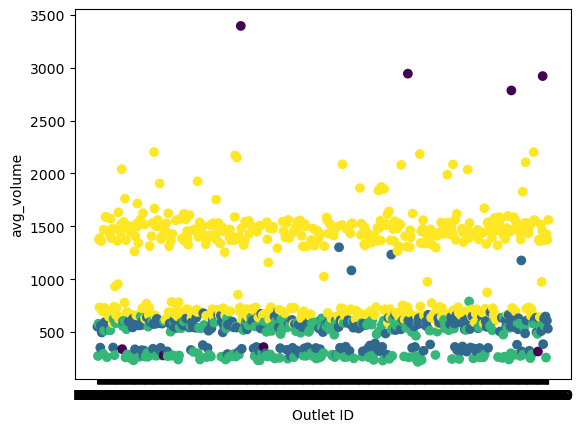

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# Extract the features to cluster on
X = df.iloc[:, 1:].values

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create the DBSCAN object
dbscan = DBSCAN(eps=2, min_samples=5)

# Fit the DBSCAN model
clusters = dbscan.fit_predict(X_std)

# Add the clusters to the original DataFrame
df['cluster'] = clusters

# Visualize the clusters
plt.scatter(df['Outlet_ID'], df['avg_volume'], c=clusters)
plt.xlabel('Outlet ID')
plt.ylabel('avg_volume')
plt.show()

In [74]:
data = outlets_df.copy()

In [75]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(["Outlet_ID"], axis=1))

# Create the agglomerative clustering object
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the clustering model on the data
clusters = agg_clustering.fit_predict(scaled_data)

In [76]:
# # Add the cluster labels to the original dataset
# data["Cluster"] = clusters

# # Plot the clusters
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'black']
# for i in range(len(data)):
#     ax.scatter(data.iloc[i, 2], data.iloc[i, 3], data.iloc[i, 7], c=colors[data.iloc[i, 8]])
# ax.set_xlabel("Area")
# ax.set_ylabel("Avg Volume")
# ax.set_zlabel("Avg Income per Area")
# plt.show()

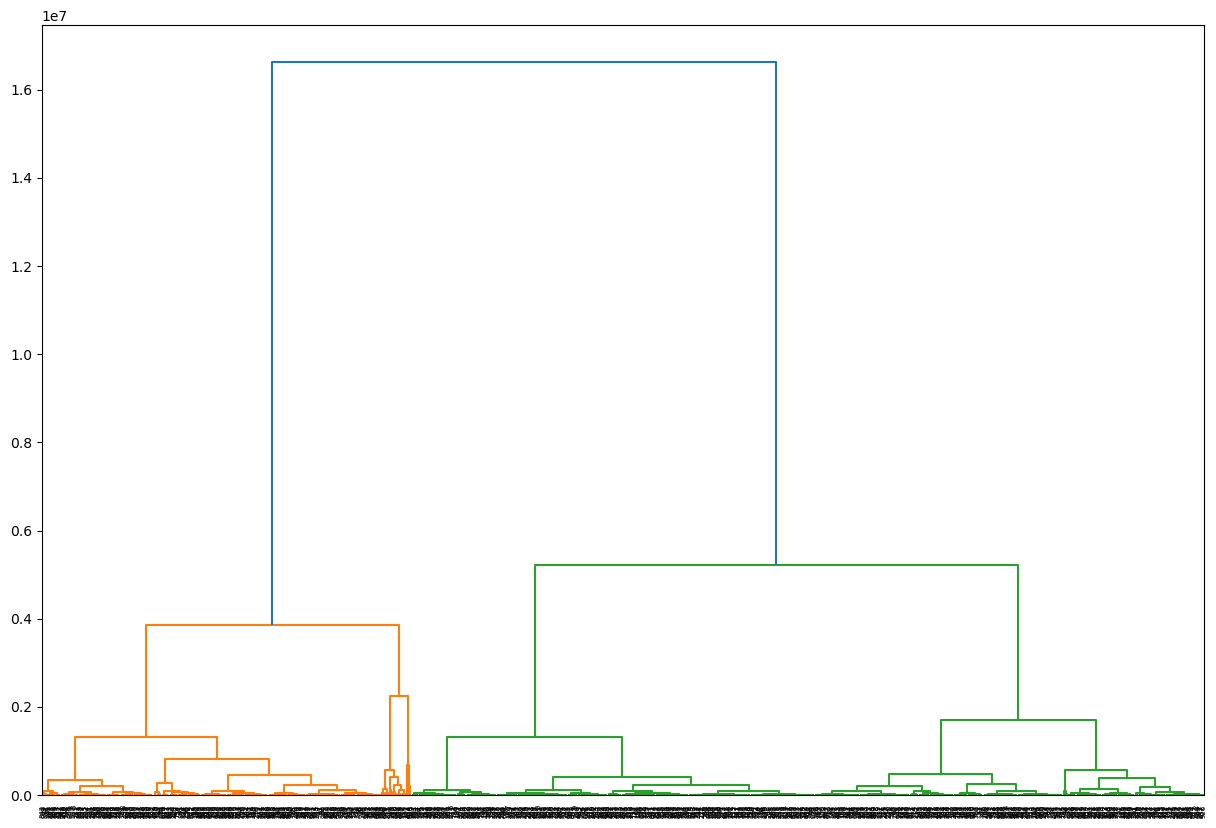

n_clusters: 2 	score: 0.7822822617880106
n_clusters: 3 	score: 0.7591622110366577
n_clusters: 4 	score: 0.7648032278473889
n_clusters: 5 	score: 0.7588601032557126
n_clusters: 6 	score: 0.7417882315546804
n_clusters: 7 	score: 0.7583856330848582
n_clusters: 8 	score: 0.6781630964776516
n_clusters: 9 	score: 0.6797708224936371
n_clusters: 10 	score: 0.6794173065163877


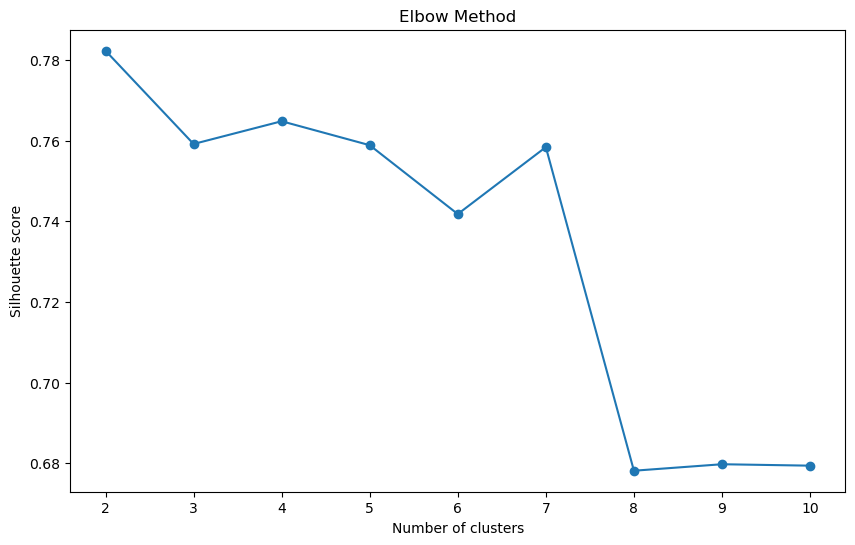

In [77]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# load the data
data = outlets_df.copy()

# create linkage matrix using ward linkage method
Z = linkage(data.iloc[:, 1:], method='ward')

# plot dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.show()

# apply Agglomerative Clustering with different number of clusters
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    model.fit(data.iloc[:, 1:])
    score = silhouette_score(data.iloc[:, 1:], model.labels_)
    print("n_clusters:", n_clusters, "\tscore:", score)

# plot Elbow method
scores = []
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    model.fit(data.iloc[:, 1:])
    score = silhouette_score(data.iloc[:, 1:], model.labels_)
    scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Elbow Method")
plt.show()

In [78]:
data = outlets_df.copy()
# Extract features
X = data.drop(["Outlet_ID"], axis=1)

# Calculate silhouette score for a range of cluster sizes
n_clusters = range(2, 10)
silhouette_scores = []
for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n)
    labels = model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Find the ideal number of clusters
ideal_n_clusters = 2

# Print the ideal number of clusters
print("Ideal number of clusters:", ideal_n_clusters)

# Calculate clustering metrics for the ideal number of clusters
model = AgglomerativeClustering(n_clusters=ideal_n_clusters)
labels = model.fit_predict(X)

ch_score = calinski_harabasz_score(X, labels)
db_score = davies_bouldin_score(X, labels)
silhouette = silhouette_score(X, labels)

# Print the metrics
# print("Inertia:", inertia)
print("Calinski-Harabasz score:", ch_score)
print("Davies-Bouldin score:", db_score)
print("Silhouette score:", silhouette)

Ideal number of clusters: 2
Calinski-Harabasz score: 4610.035988454635
Davies-Bouldin score: 0.3076028256649976
Silhouette score: 0.7822822617880106


In [79]:
outlets_df

,Outlet_ID,area(sqft),avg_volume,avg_income,no_of_products,avg_units,BP_outlet,avg_income_per_area,avg_volume_per_sqft
0,ID1008,3387.0,550.033333,2.742492e+05,5,2750.166667,0,80.971115,0.162395
1,ID1012,1931.0,272.916667,3.040542e+05,5,272.916667,1,157.459434,0.141334
2,ID1024,3127.0,578.583333,6.438583e+05,5,578.583333,1,205.902889,0.185028
3,ID1029,5294.0,1376.500000,1.116763e+06,10,4095.166667,1,210.948873,0.260011
4,ID1036,2584.0,733.466667,5.282392e+05,10,2613.666667,1,204.426922,0.283849
...,...,...,...,...,...,...,...,...,...
946,ID9960,4690.0,1423.933333,1.182026e+06,10,4030.666667,1,252.031095,0.303611
947,ID9971,3960.0,608.050000,3.048600e+05,5,3040.250000,0,76.984848,0.153548
948,ID9973,4038.0,1372.400000,1.125119e+06,10,4005.666667,1,278.632780,0.339871
949,ID9979,4456.0,531.533333,2.648592e+05,5,2657.666667,0,59.438772,0.119285


In [80]:
from scipy.spatial import distance_matrix

def density_based_initialization(X, n_clusters, random_state=0):
    # Calculate the distance matrix between all data points
    dist_matrix = distance_matrix(X, X)

    # Calculate the density of each data point as the sum of distances to other data points
    densities = np.sum(dist_matrix, axis=1)

    # Sort the data points by density in descending order
    sorted_indices = np.argsort(densities)[::-1]

    # Select the top n_clusters data points with the highest densities as initial centroids
    initial_indices = sorted_indices[:n_clusters]
    initial_centroids = X[initial_indices]

    return initial_centroids

In [81]:
outlets_df

,Outlet_ID,area(sqft),avg_volume,avg_income,no_of_products,avg_units,BP_outlet,avg_income_per_area,avg_volume_per_sqft
0,ID1008,3387.0,550.033333,2.742492e+05,5,2750.166667,0,80.971115,0.162395
1,ID1012,1931.0,272.916667,3.040542e+05,5,272.916667,1,157.459434,0.141334
2,ID1024,3127.0,578.583333,6.438583e+05,5,578.583333,1,205.902889,0.185028
3,ID1029,5294.0,1376.500000,1.116763e+06,10,4095.166667,1,210.948873,0.260011
4,ID1036,2584.0,733.466667,5.282392e+05,10,2613.666667,1,204.426922,0.283849
...,...,...,...,...,...,...,...,...,...
946,ID9960,4690.0,1423.933333,1.182026e+06,10,4030.666667,1,252.031095,0.303611
947,ID9971,3960.0,608.050000,3.048600e+05,5,3040.250000,0,76.984848,0.153548
948,ID9973,4038.0,1372.400000,1.125119e+06,10,4005.666667,1,278.632780,0.339871
949,ID9979,4456.0,531.533333,2.648592e+05,5,2657.666667,0,59.438772,0.119285


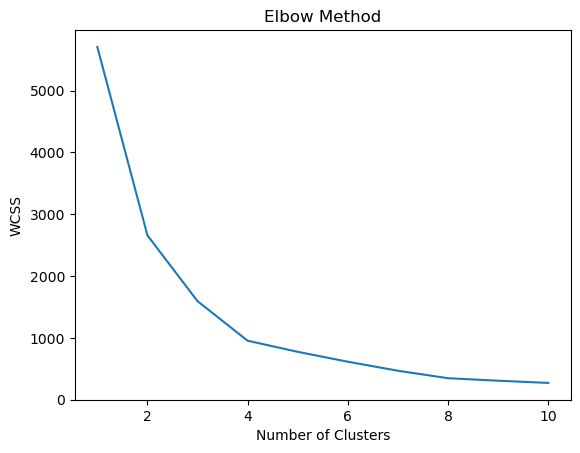

In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# turn off warnings
import warnings

warnings.filterwarnings('ignore')

# Load dataset
data = outlets_df.drop(['Outlet_ID', 'avg_volume_per_sqft'], axis=1)

# Preprocess data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


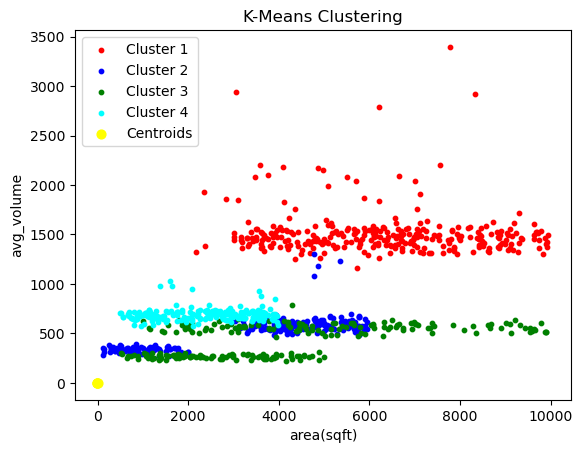

In [83]:
# Train K-Means clustering model with optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=10, c='cyan', label='Cluster 4')
# plt.scatter(X_scaled[y_kmeans==4, 0], X_scaled[y_kmeans==4, 1], s=10, c='magenta', label='Cluster 5')
# plt.scatter(X_scaled[y_kmeans==5, 0], X_scaled[y_kmeans==5, 1], s=10, c='black', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40, c='yellow', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('area(sqft)')
plt.ylabel('avg_volume')
plt.legend()
plt.show()

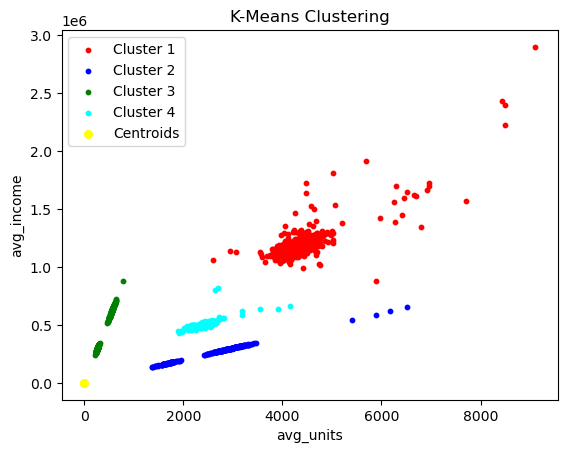

In [84]:
# for feature 2
# Visualize clusters
plt.scatter(X[y_kmeans==0, 4], X[y_kmeans==0, 2], s=10, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans==1, 4], X[y_kmeans==1, 2], s=10, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans==2, 4], X[y_kmeans==2, 2], s=10, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans==3, 4], X[y_kmeans==3, 2], s=10, c='cyan', label='Cluster 4')
# plt.scatter(X_scaled[y_kmeans==4, 2], X_scaled[y_kmeans==4, 1], s=10, c='magenta', label='Cluster 5')
# plt.scatter(X_scaled[y_kmeans==5, 2], X_scaled[y_kmeans==5, 1], s=10, c='black', label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='yellow', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('avg_units')
plt.ylabel('avg_income')
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans.labels_)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X_scaled, kmeans.labels_)}")

Inertia: 953.5125310247021
Silhouette Score: 0.6247185370449189
Calinski Harabasz Score: 1573.3425926708353
Davies Bouldin Score: 0.5894668226459121


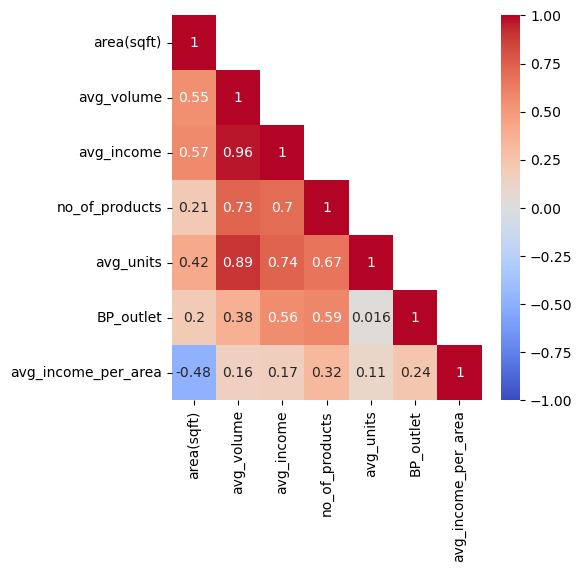

In [86]:
# correlation matrix and heatmap
corr = data.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=np.triu(corr, k=1), vmin=-1, vmax=1)
plt.show()

In [87]:
# get the cluster numbers for each outlet in outlets_df
outlets_df['cluster'] = y_kmeans

In [88]:
outlets_df.groupby('cluster').count()

,Outlet_ID,area(sqft),avg_volume,avg_income,no_of_products,avg_units,BP_outlet,avg_income_per_area,avg_volume_per_sqft
cluster,,,,,,,,,
0,303,303,303,303,303,303,303,303,303
1,235,235,235,235,235,235,235,235,235
2,229,229,229,229,229,229,229,229,229
3,184,184,184,184,184,184,184,184,184


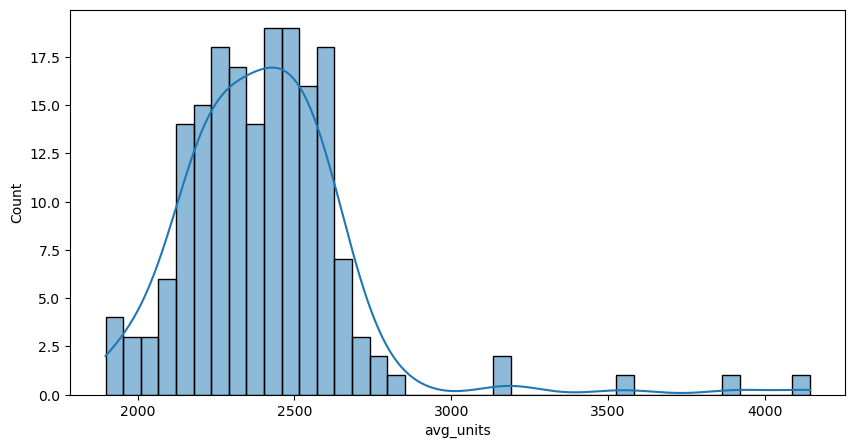

In [89]:
# cluster 0 area distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=outlets_df[outlets_df['cluster'] == 3], x='avg_units', bins=40, kde=True)
plt.show()

In [90]:
# average sqrt area for each cluster
cluster_df = outlets_df.groupby('cluster')['area(sqft)'].mean()
cluster_df = pd.DataFrame(cluster_df)
# average units sold for each cluster
cluster_df['avg_units'] = outlets_df.groupby('cluster')['avg_units'].mean()
cluster_df.reset_index(inplace=True)
# average volume sold per cluster
cluster_df['avg_volume'] = outlets_df.groupby('cluster')['avg_volume'].mean()
# average income per cluster
cluster_df['avg_income'] = outlets_df.groupby('cluster')['avg_income'].mean()
cluster_df

,cluster,area(sqft),avg_units,avg_volume,avg_income
0,0,6256.293729,4503.692244,1515.689384,1.227222e+06
1,1,3456.357447,2602.012411,520.402482,2.602468e+05
2,2,4064.751092,435.355531,435.355531,4.832834e+05
3,3,2327.361413,2407.232790,690.598007,5.046956e+05


In [91]:
# # since we don;t have cost vlaues for freezers, we will use the volume sold as a proxy for cost
# freezer_df['cost'] = freezer_df['Power and maitainance ??Cost (LKR) per 100 hours'] / freezer_df['Volume Capacity (Liters)']


In [92]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans.labels_)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans.labels_)}")
print(f"Davies Bouldin Score: {davies_bouldin_score(X_scaled, kmeans.labels_)}")

Inertia: 953.5125310247021
Silhouette Score: 0.6247185370449189
Calinski Harabasz Score: 1573.3425926708353
Davies Bouldin Score: 0.5894668226459121


### Freezer allocation

In [93]:
freezer_df

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [94]:
def ROI(avg_income):
    dict_freezers = {}

    for i in range(len(freezer_df)):
        dict_freezers[freezer_df.iloc[i, 0]] = avg_income / (freezer_df.iloc[i, 3] * 1.44)

    return dict_freezers

In [95]:
# get the ROI dictionary for each feature and add it to the cluster_df as a new columns for each freezer
ROI_dict = {}

for i in range(len(cluster_df)):
    ROI_dict[cluster_df.iloc[i, 0]] = ROI(cluster_df.iloc[i, 3])

# make features in ROI_dict as columns in cluster_df
ROI_df = pd.DataFrame(ROI_dict)
ROI_df = ROI_df.T
ROI_df.reset_index(inplace=True)
ROI_df.rename(columns={'index': 'cluster'}, inplace=True)

# add ROI to the every column name in ROI_df
# ROI_df.columns = ['cluster'] + [f'ROI_{col}' for col in ROI_df.columns][1:]

In [96]:
ROI_df

,cluster,ChillMaster,FreezeZone,CoolTech,mini CoolTech,IceBlast Pro,IceBlast,FreezeTech,FreezeTech 3.0,ChillTech,IceTech
0,0,0.421025,0.375915,0.328926,0.584757,0.300732,0.389838,0.350854,0.657851,0.375915,0.233903
1,1,0.144556,0.129068,0.112935,0.200773,0.103254,0.133848,0.120464,0.225869,0.129068,0.080309
2,2,0.120932,0.107975,0.094478,0.167961,0.086380,0.111974,0.100777,0.188956,0.107975,0.067184
3,3,0.191833,0.171279,0.149869,0.266434,0.137023,0.177623,0.159861,0.299739,0.171279,0.106574


In [97]:
def ISR(avg_volume):
    dict_freezers = {}

    for i in range(len(freezer_df)):
        dict_freezers[freezer_df.iloc[i, 0]] = avg_volume / freezer_df.iloc[i, 2]

    return dict_freezers

In [98]:
# get the ISR dictionary for each feature and add it to the cluster_df as a new columns for each freezer
ISR_dict = {}

for i in range(len(cluster_df)):
    ISR_dict[cluster_df.iloc[i, 0]] = ISR(cluster_df.iloc[i, 2])

# make features in ISR_dict as columns in cluster_df
ISR_df = pd.DataFrame(ISR_dict)
ISR_df = ISR_df.T
ISR_df.reset_index(inplace=True)

In [99]:
ISR_df.rename(columns={'index': 'cluster'}, inplace=True)

In [100]:
ISR_df

,cluster,ChillMaster,FreezeZone,CoolTech,mini CoolTech,IceBlast Pro,IceBlast,FreezeTech,FreezeTech 3.0,ChillTech,IceTech
0,0,81.885314,60.049230,37.530769,150.123075,30.024615,69.287573,45.036922,180.147690,56.296153,22.518461
1,1,47.309317,34.693499,21.683437,86.733747,17.346749,40.030960,26.020124,104.080496,32.525155,13.010062
2,2,7.915555,5.804740,3.627963,14.511851,2.902370,6.697777,4.353555,17.414221,5.441944,2.176778
3,3,43.767869,32.096437,20.060273,80.241093,16.048219,37.034351,24.072328,96.289312,30.090410,12.036164


In [101]:
# divide ROI_df by ISR_df to get the final score
final_score_df = ROI_df.iloc[:, 1:] * ISR_df.iloc[:, 1:]

# add the cluster column to the final_score_df
final_score_df['cluster'] = ROI_df['cluster']

In [102]:
final_score_df

,ChillMaster,FreezeZone,CoolTech,mini CoolTech,IceBlast Pro,IceBlast,FreezeTech,FreezeTech 3.0,ChillTech,IceTech,cluster
0,34.475750,22.573408,12.344832,87.785475,9.029363,27.010915,15.801385,118.510391,21.162570,5.267128,0
1,6.838857,4.477823,2.448810,17.413757,1.791129,5.358079,3.134476,23.508571,4.197959,1.044825,1
2,0.957245,0.626767,0.342763,2.437428,0.250707,0.749978,0.438737,3.290528,0.587594,0.146246,2
3,8.396112,5.497454,3.006420,21.378989,2.198982,6.578150,3.848218,28.861635,5.153863,1.282739,3


In [103]:
# make cluster column as index and melt the dataframe
final_score_df.set_index('cluster', inplace=True)

final_score_df = final_score_df.melt(ignore_index=False)

final_score_df.reset_index(inplace=True)


In [104]:
final_score_df

,cluster,variable,value
0,0,ChillMaster,34.475750
1,1,ChillMaster,6.838857
2,2,ChillMaster,0.957245
3,3,ChillMaster,8.396112
4,0,FreezeZone,22.573408
5,1,FreezeZone,4.477823
6,2,FreezeZone,0.626767
7,3,FreezeZone,5.497454
8,0,CoolTech,12.344832
9,1,CoolTech,2.448810


In [105]:
final_score_df[final_score_df['cluster'] == 3].sort_values(by='value', ascending=False)

,cluster,variable,value
31,3,FreezeTech 3.0,28.861635
15,3,mini CoolTech,21.378989
3,3,ChillMaster,8.396112
23,3,IceBlast,6.578150
7,3,FreezeZone,5.497454
35,3,ChillTech,5.153863
27,3,FreezeTech,3.848218
11,3,CoolTech,3.006420
19,3,IceBlast Pro,2.198982
39,3,IceTech,1.282739


In [106]:
max_score_df = final_score_df.loc[final_score_df.groupby('cluster')['value'].idxmax(), ['cluster', 'variable']]
max_score_df

,cluster,variable
28,0,FreezeTech 3.0
29,1,FreezeTech 3.0
30,2,FreezeTech 3.0
31,3,FreezeTech 3.0
